<a href="https://colab.research.google.com/github/adasegroup/ML2023_seminars/blob/master/seminar16/seminar_clustering_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Clustering

#### Seminar structure:

* Clustering for IRIS data
* Scoring for cluster analysis
* Clustering methods


## 1. Cluster analysis, what for?

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Nice and very accurate classification, and why do we need cluster analysis?', np.round(clf.score(X_test, y_test),3))

Nice and very accurate classification, and why do we need cluster analysis? 0.978


In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

def plot_3d (X, y, title = 'MNIST visualization PCA'):
    
    digits_3d = pd.DataFrame({
        'x': X[:, 0], 
        'y': X[:, 1], 
        'z': X[:, 2],
        'label': y,
    })

    colors = cl.scales['10']['qual']['Paired']
    data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color 
            }
        }
        data.append(trace)

    layout = go.Layout(
        title= title,
        width=900,
        height=600
    )

    fig = go.Figure(data=data, layout=layout)

    iplot(fig, show_link = False)

In [4]:
plot_3d(X, y, 'IRIS true labels')

#### But what if we have no targets at all?

In [5]:
plot_3d(X, np.zeros_like(y), 'IRIS no labels :(')

### 1.1. We do not know clustering algorithms, what we can do right now?

- apply dimensionality reduction methods;
- apply anomaly detection methods;
- estimate visually;

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # just because it of 3D visualisation

iris = load_iris()
X = iris.data
y = iris.target

pca.fit(X)
X = pca.transform(X)
plot_3d(X, np.zeros_like(y), 'PCA() IRIS no labels')

### 1.2. Scoring methods in cluster analysis:

How can we estimate the accurasy of the clustering if we have no labels?

In [7]:
dummy_labels = np.zeros_like(y)

dummy_labels[X[:,0] > -2] = 1 # defining two classes

# let' have look how it worked out
plot_3d(X, dummy_labels, 'PCA() IRIS, dummy labels')

#### 1.2.1. Homogeneity, completeness, and V-measure

Homogeneity, completeness, and V-measure are three key related indicators of the quality of a clustering operation. 

**Homogenity:** scores that each cluster has data-points belonging to the same class label. Homogeneity describes the closeness of the clustering algorithm to this perfection.

For $N$ data samples, C different class labels, $K$ clusters and $a_{ck}$ number of data-points belonging to the class c and cluster k. Then the homogeneity $h$ is given by the following:
$$h = 1- \frac{H(C,K)}{H(C)}$$,

where 
$$H(C,K) = - \sum_{k=1}^{K}\sum_{c=1}^{C} \frac{a_{ck}}{N} log(\frac{a_{ck}}{\sum_{c=1}^{C}a_{ck}})$$
and

$$H(C) = -\sum_{c=1}^{C} \frac{\sum_{k=1}^{K} a_{ck}}{C} log(\frac{\sum_{k=1}^{K} a_{ck}}{C})$$

**Completeness:** scores if all data-points belonging to the same class are clustered into the same cluster. Completeness describes the closeness of the clustering algorithm to this perfection.

$$ c = 1 - \frac{H(K,C)}{H(K)}$$

**V-Measure**:

`v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)`


Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html

#### 1.2.2. Silhouette coefficient

The silhouette coefficient contrasts the average distance to elements in the same cluster with the average distance to elements in other clusters. Objects with a high silhouette value are considered well clustered, objects with a low value may be outliers. This index works well with k-means clustering, and is also used to determine the optimal number of clusters.

Assume the data have been clustered via any technique, such as `k-means`, into $k$ clusters. 

For data point $i \in C_i$ (data point $i$ in the cluster $C_i$), let 

$$ a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, i \neq j} d(i, j) $$

be the mean distance between $i$ and all other data points in the same cluster, where $d(i, j)$ is the distance between data points $i$ and $j$ in the cluster $C_i$ (we divide by $|C_i| - 1$ because we do not include the distance $d(i, i)$ in the sum). We can interpret $a(i)$ as a measure of how well $i$ is assigned to its cluster (the smaller the value, the better the assignment). 

#### 1.2.3. Rand index adjusted for chance.

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

#### 1.2.4. Mutual Information between two clusterings.
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels of the same data. Where 
 is the number of the samples in cluster 
 and 
 is the number of the samples in cluster 
, the Mutual Information between clusterings  and  is given as:

$$MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}$$


This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score

In [8]:
from sklearn import metrics

def cluster_scoring(X, y, dummy_labels):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, dummy_labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, dummy_labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, dummy_labels))
    print("Silhouette Score: %.3f" % metrics.silhouette_score(X, dummy_labels))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y, dummy_labels))
    print("Mutual Information: %.3f" % metrics.mutual_info_score(y, dummy_labels))
    
cluster_scoring(X, y, dummy_labels)

Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Silhouette Score: 0.693
Adjusted Rand-Index: 0.568
Mutual Information: 0.637


#### And let's define the pivot table:

In [9]:
iris_cluster = pd.DataFrame()

def cluster_scoring_pivot(X, y, dummy_labels, iris_cluster, alg):
    cluster_scoring(X, y, dummy_labels)
    iris_cluster = iris_cluster.append({'algorithm':alg,
                        'hom': metrics.homogeneity_score(y, dummy_labels),
                        'comp': metrics.completeness_score(y, dummy_labels),
                        'v-measure': metrics.v_measure_score(y, dummy_labels),
                        'silhouette': metrics.silhouette_score(X, dummy_labels),
                        'rand. index': metrics.adjusted_rand_score(y, dummy_labels),
                        'mutual info': metrics.mutual_info_score(y, dummy_labels)}, ignore_index =True) 
    return iris_cluster 

iris_cluster = cluster_scoring_pivot(X, y, dummy_labels, iris_cluster, 'dummy')

Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Silhouette Score: 0.693
Adjusted Rand-Index: 0.568
Mutual Information: 0.637


## 2. Clustering types:

#### __Clustering__ - is unsupervised learning methods for gouping samples.

#### types: 

    1.1. Centroid-based Clustering
    1.2. Density-based Clustering 
    1.3. Hierarchical Clustering
    1.4. Distribution-based Clustering

## 2.1. Centroid-based Clustering: `KMeans`

Organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. This course focuses on k-means because it is an efficient, effective, and simple clustering algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

![kmeans](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(2)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 2')
iris_cluster = cluster_scoring_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 2')

Homogeneity: 0.522
Completeness: 0.884
V-measure: 0.657
Silhouette Score: 0.681
Adjusted Rand-Index: 0.540
Mutual Information: 0.574


What is we do not know the `n_components`?

### Let's go to Seminar #14

We will estimate the Intrinsic Dimentionality of IRIS with MLE estimation.

NIPS 2004: https://papers.nips.cc/paper/2577-maximum-likelihood-estimation-of-intrinsic-dimension.pdf

In [11]:
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasian statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=2, mode='bootstrap', **func_kw):
    rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

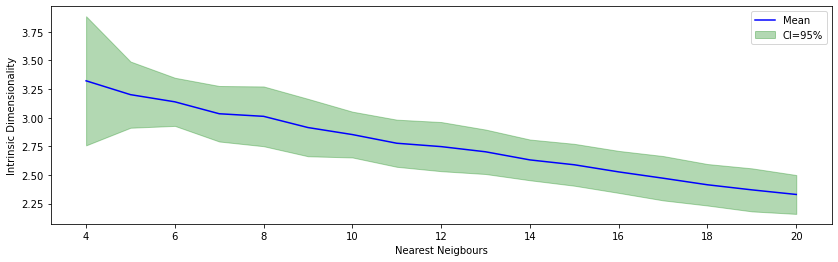

In [12]:
import warnings
warnings.filterwarnings("ignore")
from numpy import inf

k1 = 2 # start of interval(included)
k2 = 20 # end of interval(included)
nb_iter = 10 # more iterations more accuracy

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(3)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 3')
iris_cluster = cluster_scoring_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 3')

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Silhouette Score: 0.553
Adjusted Rand-Index: 0.730
Mutual Information: 0.826


## 2.2. Density-based Clustering: `DBSCAN`

Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

![dbscan](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/600px-DBSCAN-Illustration.svg.png)

In [14]:
#DBSCAN?

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

X = iris.data
y = iris.target

db = DBSCAN()# how many components we define here?
db.fit(X)

y_pred = LabelEncoder().fit_transform(db.labels_)

plot_3d(X, y_pred, 'DBSCAN')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'DBSCAN')

Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Silhouette Score: 0.486
Adjusted Rand-Index: 0.521
Mutual Information: 0.615


## 2.3. Distribution-based Clustering: `GaussianMixture()`

This clustering approach assumes data is composed of distributions, such as Gaussian distributions. In the figure below the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

![gmixture](1_lTv7e4Cdlp738X_WFZyZHA.png)

In [16]:
from sklearn.mixture import GaussianMixture

X = iris.data
y = iris.target

gm = GaussianMixture(n_components = 3) # what if will not define the num. pf components?
gm.fit(X)

y_pred = gm.predict(X)

plot_3d(X, y_pred, 'GaussianMixture, n_components = 3 ')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'GaussianMixture')

Homogeneity: 0.898
Completeness: 0.901
V-measure: 0.900
Silhouette Score: 0.501
Adjusted Rand-Index: 0.904
Mutual Information: 0.987


## 2.4. Hierarchical Clustering: `AgglomerativeClustering()`

Hierarchical clustering creates a tree of clusters. 

![hierarchical](Agglomerative_clustering_dendogram.png)

In [17]:
from sklearn.cluster import AgglomerativeClustering

X = iris.data
y = iris.target

ac = AgglomerativeClustering(n_clusters = 3) # what if will define the num. pf components?
ac.fit(X)

y_pred = LabelEncoder().fit_transform(ac.labels_)

plot_3d(X, y_pred, 'AgglomerativeClustering, n_clusters = 3 ')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'AgglomerativeClustering')

Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770
Silhouette Score: 0.554
Adjusted Rand-Index: 0.731
Mutual Information: 0.836


#### voilla, let's check the pivot:

In [20]:
iris_cluster.style.background_gradient(axis=1, cmap='PuBu', low=0, high = 1)